In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yaml
from pathlib import Path
from src.L_functions import get_vol, get_neg_sharpe, rast
from src.Models import Multi_CBO_model, gen_Psi,CBO_model
from src.utils import Lmin, avg_x, avg_L, load_config, next_run_index, save_run_config
import random
import os
import sys
from tqdm import trange  # pip install tqdm

In [89]:
def has_converged_all_coords_equal(X: np.ndarray, tol: float = 1e-6) -> bool:
    """
    X: (N, D) 파티클 행렬
    tol: 좌표별 허용 오차. max-min <= tol 이면 같은 값으로 간주.
    """
    # np.ptp = max - min, axis=0 → 각 좌표(l)별 범위
    return np.all(np.ptp(X, axis=0) <= tol)

In [90]:
RESULTS_ROOT = Path("./results")
SIMNAME_SUB  = "250902RAST_Sigma"


# ---- 메인 ----
# np.random.seed(1)
base_cfg   = load_config("configs/configRAST.yaml")
config = dict(base_cfg)
# x0 = 2 * np.random.rand(config['nump'], config['D']) + 2
# np.save( "x0.npy", x0)
# x0 = np.load("x0.npy")

lam1 = 0 
sigma = 0 
for sigma in [0,1,2,3,4,5]:
    print(sigma,lam1)
    run_idx  = next_run_index(RESULTS_ROOT, SIMNAME_SUB)
    run_name = f"{SIMNAME_SUB}_{run_idx}"
    run_root = RESULTS_ROOT / run_name           # 상위 simname 폴더 (여기 아래에 sim0000 ... 생성)
    run_root.mkdir(parents=True, exist_ok=True)

    # 원본 yaml 직접 덮지 말고 메모리에서 수정
    config = dict(base_cfg)
    config["sigma"]    = sigma
    config["simname"] = run_name
    config["lam1"] = lam1
    save_run_config(run_root, config)

    # 문제 정의

    L = rast



    # 공용 초기값 (원하면 실험별 동일 초기값)
    # x0 = 2 * np.random.rand(config['nump'], config['D']) + 2
    # np.save(run_root / "x0.npy", x0)

    nsim    = int(config['sim'])
    maxiter = int(config.get('maxiter', 1000))

    # 진행률: 바깥 루프(시뮬레이션 개수)
    for simnum in range(nsim):
        # 개별 sim 폴더 생성 ...
        sim_dir  = run_root / f"sim{simnum:04d}"
        figs_dir = sim_dir / "figs"
        figs_dir.mkdir(parents=True, exist_ok=True)
    
        model = CBO_model(L, config)
        model.path = str(sim_dir.resolve()) + "/"
        model.make_path()
    
        # x = np.load( "x0.npy")
        np.random.seed(simnum)
        x = 2 * np.random.rand(config['nump'], config['D']) + 2
        if simnum==30:
            print('simnum=', simnum, 'x[0,0]=', x[0,0], flush=True)
        E = np.zeros(maxiter, dtype=float)
    
        for it in range(maxiter):
    
            if config.get('model', 1) == 1:
                x = model.step(x, L)
            else:
                raise NotImplementedError("model!=1 분기 사용 시 다른 모델 지정 필요")
    
            model.trace_func(x, lambda z: z, "coord")
            model.trace_func(x, lambda x: model.best_loss(x, L), "best_L")
            # --- 진행률 (print 버전) ---
            # if (it + 1) % 50 == 0 or it == maxiter - 1:
            #     pct = (simnum * maxiter + it + 1) / (nsim * maxiter) * 100
            #     print(f"\rProgress: {pct:.1f}%", end="")
            if has_converged_all_coords_equal(x,1e-4):

                break
        # 시뮬레이션 종료 후 개행
        # print(it)
        model.save_func("coord", simnum=simnum)
        model.save_func("best_L", simnum=simnum)
        # eps = 1e-12
        # plt.figure()
        # plt.plot(np.arange(maxiter), E + eps, label='E_n')
        # plt.yscale('log')
        # plt.title(f'sim{simnum:04d}')
        # plt.xlabel('iter')
        # plt.ylabel('energy')
        # plt.legend()
        # plt.savefig(figs_dir / "energy.png", dpi=150, bbox_inches="tight")
        # plt.close()


0 0
simnum= 30 x[0,0]= 3.28828707213667
1 0
simnum= 30 x[0,0]= 3.28828707213667
2 0
simnum= 30 x[0,0]= 3.28828707213667
3 0
simnum= 30 x[0,0]= 3.28828707213667
4 0
simnum= 30 x[0,0]= 3.28828707213667
5 0
simnum= 30 x[0,0]= 3.28828707213667


In [91]:
RESULTS_ROOT = Path("./results")
SIMNAME_SUB  = "250902RAST_Lam1"


# ---- 메인 ----
# np.random.seed(1)
base_cfg   = load_config("configs/configRAST.yaml")
config = dict(base_cfg)
# x0 = 2 * np.random.rand(config['nump'], config['D']) + 2
# np.save( "x0.npy", x0)
# x0 = np.load("x0.npy")

lam1 = 0 
sigma = 0 
for lam1 in [0,1,2,3,4,5,6,7,8,9,10]:
    print(sigma,lam1)
    run_idx  = next_run_index(RESULTS_ROOT, SIMNAME_SUB)
    run_name = f"{SIMNAME_SUB}_{run_idx}"
    run_root = RESULTS_ROOT / run_name           # 상위 simname 폴더 (여기 아래에 sim0000 ... 생성)
    run_root.mkdir(parents=True, exist_ok=True)

    # 원본 yaml 직접 덮지 말고 메모리에서 수정
    config = dict(base_cfg)
    config["sigma"]    = sigma
    config["simname"] = run_name
    config["lam1"] = lam1
    save_run_config(run_root, config)

    # 문제 정의

    L = rast



    # 공용 초기값 (원하면 실험별 동일 초기값)
    # x0 = 2 * np.random.rand(config['nump'], config['D']) + 2
    # np.save(run_root / "x0.npy", x0)

    nsim    = int(config['sim'])
    maxiter = int(config.get('maxiter', 1000))

    # 진행률: 바깥 루프(시뮬레이션 개수)
    for simnum in range(nsim):
        # 개별 sim 폴더 생성 ...
        sim_dir  = run_root / f"sim{simnum:04d}"
        figs_dir = sim_dir / "figs"
        figs_dir.mkdir(parents=True, exist_ok=True)
    
        model = CBO_model(L, config)
        model.path = str(sim_dir.resolve()) + "/"
        model.make_path()
    
        # x = np.load( "x0.npy")
        np.random.seed(simnum)
        x = 2 * np.random.rand(config['nump'], config['D']) + 2
        if simnum==30:
            print('simnum=', simnum, 'x[0,0]=', x[0,0], flush=True)
        E = np.zeros(maxiter, dtype=float)
    
        for it in range(maxiter):
    
            if config.get('model', 1) == 1:
                x = model.step(x, L)
            else:
                raise NotImplementedError("model!=1 분기 사용 시 다른 모델 지정 필요")
    
            model.trace_func(x, lambda z: z, "coord")
            model.trace_func(x, lambda x: model.best_loss(x, L), "best_L")
            # --- 진행률 (print 버전) ---
            # if (it + 1) % 50 == 0 or it == maxiter - 1:
            #     pct = (simnum * maxiter + it + 1) / (nsim * maxiter) * 100
            #     print(f"\rProgress: {pct:.1f}%", end="")
            if has_converged_all_coords_equal(x,1e-4):

                break
        # 시뮬레이션 종료 후 개행
        # print(it)
        model.save_func("coord", simnum=simnum)
        model.save_func("best_L", simnum=simnum)
        # eps = 1e-12
        # plt.figure()
        # plt.plot(np.arange(maxiter), E + eps, label='E_n')
        # plt.yscale('log')
        # plt.title(f'sim{simnum:04d}')
        # plt.xlabel('iter')
        # plt.ylabel('energy')
        # plt.legend()
        # plt.savefig(figs_dir / "energy.png", dpi=150, bbox_inches="tight")
        # plt.close()


0 0
simnum= 30 x[0,0]= 3.28828707213667
0 1
simnum= 30 x[0,0]= 3.28828707213667
0 2
simnum= 30 x[0,0]= 3.28828707213667
0 3
simnum= 30 x[0,0]= 3.28828707213667
0 4
simnum= 30 x[0,0]= 3.28828707213667
0 5
simnum= 30 x[0,0]= 3.28828707213667
0 6
simnum= 30 x[0,0]= 3.28828707213667
0 7
simnum= 30 x[0,0]= 3.28828707213667
0 8
simnum= 30 x[0,0]= 3.28828707213667
0 9
simnum= 30 x[0,0]= 3.28828707213667
0 10
simnum= 30 x[0,0]= 3.28828707213667


In [92]:
print(nsim)

50


In [93]:
from src.trace_stats import summarize_scalar_trace, summarize_coord_trace, save_stats_json

run_root = "results/250902RAST_Lam1_0"   # 본인 실험 폴더

# 1) best_L (스칼라) 통계
bestL_stats = summarize_scalar_trace(run_root, funcname="best_L")
print("best_L mean[-10:]:", bestL_stats["mean"][-10:])
save_stats_json(bestL_stats, f"{run_root}/stats/best_L_stats.json")

# 2) coord (N,D) 통계
coord_stats = summarize_coord_trace(run_root, funcname="coord",
                                    reduce_over="particles_and_sims")
print("coord mean shape:", coord_stats["mean"].shape)  # (T, D)
save_stats_json(coord_stats, f"{run_root}/stats/coord_stats.json")


best_L mean[-10:]: [12.31385483 12.31397517 12.31408396 12.31418225 12.31427103 12.31435118
 12.31442352 12.3144888  12.31454768 12.31460079]
coord mean shape: (94, 15)


In [94]:
run_root = "results/250902RAST_Lam1_0"   # 본인 실험 폴더

# 1) best_L (스칼라) 통계
bestL_statsL = summarize_scalar_trace(run_root, funcname="best_L")
print(bestL_statsL['mean'][-1])
print(bestL_statsL['std'][-1])
print(bestL_statsL['iters'])
print(bestL_statsL['iters_var'])

result_set = {}
result_set['Lam1_0'] = np.array([bestL_statsL['mean'][-1],bestL_statsL['std'][-1],bestL_statsL['iters'],bestL_statsL['iters_var']])


12.314600786709564
1.4467947652799524
94.0
0.0


In [95]:
run_root = "results/250902RAST_Lam1_1"   # 본인 실험 폴더

# 1) best_L (스칼라) 통계
bestL_statsL = summarize_scalar_trace(run_root, funcname="best_L")
print(bestL_statsL['mean'][-1])
print(bestL_statsL['std'][-1])
print(bestL_statsL['iters'])
print(bestL_statsL['iters_var'])

result_set['Lam1_1'] = np.array([bestL_statsL['mean'][-1],bestL_statsL['std'][-1],bestL_statsL['iters'],bestL_statsL['iters_var']])

9.201635678802274
0.9881024719111268
94.0
0.0


In [96]:
run_root = "results/250902RAST_Lam1_2"   # 본인 실험 폴더

# 1) best_L (스칼라) 통계
bestL_statsL = summarize_scalar_trace(run_root, funcname="best_L")
print(bestL_statsL['mean'][-1])
print(bestL_statsL['std'][-1])
print(bestL_statsL['iters'])
print(bestL_statsL['iters_var'])

result_set['Lam1_2'] = np.array([bestL_statsL['mean'][-1],bestL_statsL['std'][-1],bestL_statsL['iters'],bestL_statsL['iters_var']])

8.137997887858834
0.7086171083991687
94.0
0.0


In [97]:
run_root = "results/250902RAST_Lam1_3"   # 본인 실험 폴더

# 1) best_L (스칼라) 통계
bestL_statsL = summarize_scalar_trace(run_root, funcname="best_L")
print(bestL_statsL['mean'][-1])
print(bestL_statsL['std'][-1])
print(bestL_statsL['iters'])
print(bestL_statsL['iters_var'])

result_set['Lam1_3'] = np.array([bestL_statsL['mean'][-1],bestL_statsL['std'][-1],bestL_statsL['iters'],bestL_statsL['iters_var']])

7.7166424110249014
0.9566655466505245
94.0
0.0


In [98]:
run_root = "results/250902RAST_Lam1_4"   # 본인 실험 폴더

# 1) best_L (스칼라) 통계
bestL_statsL = summarize_scalar_trace(run_root, funcname="best_L")
print(bestL_statsL['mean'][-1])
print(bestL_statsL['std'][-1])
print(bestL_statsL['iters'])
print(bestL_statsL['iters_var'])

result_set['Lam1_4'] = np.array([bestL_statsL['mean'][-1],bestL_statsL['std'][-1],bestL_statsL['iters'],bestL_statsL['iters_var']])

7.476726063898948
0.9154143756985312
94.0
0.0


In [99]:
run_root = "results/250902RAST_Lam1_5"   # 본인 실험 폴더

# 1) best_L (스칼라) 통계
bestL_statsL = summarize_scalar_trace(run_root, funcname="best_L")
print(bestL_statsL['mean'][-1])
print(bestL_statsL['std'][-1])
print(bestL_statsL['iters'])
print(bestL_statsL['iters_var'])

result_set['Lam1_5'] = np.array([bestL_statsL['mean'][-1],bestL_statsL['std'][-1],bestL_statsL['iters'],bestL_statsL['iters_var']])

7.17624629653209
0.8368763282957614
94.0
0.0


In [100]:
run_root = "results/250902RAST_Lam1_6"   # 본인 실험 폴더

# 1) best_L (스칼라) 통계
bestL_statsL = summarize_scalar_trace(run_root, funcname="best_L")
print(bestL_statsL['mean'][-1])
print(bestL_statsL['std'][-1])
print(bestL_statsL['iters'])
print(bestL_statsL['iters_var'])

result_set['Lam1_6'] = np.array([bestL_statsL['mean'][-1],bestL_statsL['std'][-1],bestL_statsL['iters'],bestL_statsL['iters_var']])

7.120373929224956
1.0040142235913965
94.0
0.0


In [101]:
run_root = "results/250902RAST_Lam1_7"   # 본인 실험 폴더

# 1) best_L (스칼라) 통계
bestL_statsL = summarize_scalar_trace(run_root, funcname="best_L")
print(bestL_statsL['mean'][-1])
print(bestL_statsL['std'][-1])
print(bestL_statsL['iters'])
print(bestL_statsL['iters_var'])

result_set['Lam1_7'] = np.array([bestL_statsL['mean'][-1],bestL_statsL['std'][-1],bestL_statsL['iters'],bestL_statsL['iters_var']])

6.773421749825997
1.2334227717356157
94.0
0.0


In [102]:
run_root = "results/250902RAST_Lam1_8"   # 본인 실험 폴더

# 1) best_L (스칼라) 통계
bestL_statsL = summarize_scalar_trace(run_root, funcname="best_L")
print(bestL_statsL['mean'][-1])
print(bestL_statsL['std'][-1])
print(bestL_statsL['iters'])
print(bestL_statsL['iters_var'])

result_set['Lam1_8'] = np.array([bestL_statsL['mean'][-1],bestL_statsL['std'][-1],bestL_statsL['iters'],bestL_statsL['iters_var']])

6.987979473571276
1.4241075952778899
94.0
0.0


In [103]:
run_root = "results/250902RAST_Lam1_9"   # 본인 실험 폴더

# 1) best_L (스칼라) 통계
bestL_statsL = summarize_scalar_trace(run_root, funcname="best_L")
print(bestL_statsL['mean'][-1])
print(bestL_statsL['std'][-1])
print(bestL_statsL['iters'])
print(bestL_statsL['iters_var'])

result_set['Lam1_9'] = np.array([bestL_statsL['mean'][-1],bestL_statsL['std'][-1],bestL_statsL['iters'],bestL_statsL['iters_var']])

6.775082978344202
1.2379001474419022
94.0
0.0


In [104]:
run_root = "results/250902RAST_Lam1_10"   # 본인 실험 폴더

# 1) best_L (스칼라) 통계
bestL_statsL = summarize_scalar_trace(run_root, funcname="best_L")
print(bestL_statsL['mean'][-1])
print(bestL_statsL['std'][-1])
print(bestL_statsL['iters'])
print(bestL_statsL['iters_var'])

result_set['Lam1_10'] = np.array([bestL_statsL['mean'][-1],bestL_statsL['std'][-1],bestL_statsL['iters'],bestL_statsL['iters_var']])

6.727654495148381
1.4838904437157854
94.0
0.0


In [106]:
run_root = "results/250902RAST_Sigma_0"   # 본인 실험 폴더

# 1) best_L (스칼라) 통계
bestL_statsL = summarize_scalar_trace(run_root, funcname="best_L")
print(bestL_statsL['mean'][-1])
print(bestL_statsL['std'][-1])
print(bestL_statsL['iters'])
print(bestL_statsL['iters_var'])

result_set['Sigma_0'] = np.array([bestL_statsL['mean'][-1],bestL_statsL['std'][-1],bestL_statsL['iters'],bestL_statsL['iters_var']])

12.314600786709564
1.4467947652799524
94.0
0.0


In [107]:
run_root = "results/250902RAST_Sigma_1"   # 본인 실험 폴더

# 1) best_L (스칼라) 통계
bestL_statsL = summarize_scalar_trace(run_root, funcname="best_L")
print(bestL_statsL['mean'][-1])
print(bestL_statsL['std'][-1])
print(bestL_statsL['iters'])
print(bestL_statsL['iters_var'])

result_set['Sigma_1'] = np.array([bestL_statsL['mean'][-1],bestL_statsL['std'][-1],bestL_statsL['iters'],bestL_statsL['iters_var']])

11.75163954459171
1.0748709425057446
94.92
307.9136


In [108]:
run_root = "results/250902RAST_Sigma_2"   # 본인 실험 폴더

# 1) best_L (스칼라) 통계
bestL_statsL = summarize_scalar_trace(run_root, funcname="best_L")
print(bestL_statsL['mean'][-1])
print(bestL_statsL['std'][-1])
print(bestL_statsL['iters'])
print(bestL_statsL['iters_var'])

result_set['Sigma_2'] = np.array([bestL_statsL['mean'][-1],bestL_statsL['std'][-1],bestL_statsL['iters'],bestL_statsL['iters_var']])

10.962600411726717
1.4428460116480892
66.66
261.94440000000003


In [109]:
run_root = "results/250902RAST_Sigma_3"   # 본인 실험 폴더

# 1) best_L (스칼라) 통계
bestL_statsL = summarize_scalar_trace(run_root, funcname="best_L")
print(bestL_statsL['mean'][-1])
print(bestL_statsL['std'][-1])
print(bestL_statsL['iters'])
print(bestL_statsL['iters_var'])

result_set['Sigma_3'] = np.array([bestL_statsL['mean'][-1],bestL_statsL['std'][-1],bestL_statsL['iters'],bestL_statsL['iters_var']])

9.781387528338545
1.6794068900191015
94.42
1070.0836


In [110]:
run_root = "results/250902RAST_Sigma_4"   # 본인 실험 폴더

# 1) best_L (스칼라) 통계
bestL_statsL = summarize_scalar_trace(run_root, funcname="best_L")
print(bestL_statsL['mean'][-1])
print(bestL_statsL['std'][-1])
print(bestL_statsL['iters'])
print(bestL_statsL['iters_var'])

result_set['Sigma_4'] = np.array([bestL_statsL['mean'][-1],bestL_statsL['std'][-1],bestL_statsL['iters'],bestL_statsL['iters_var']])

9.590781818753374
1.7559581945059382
225.44
8000.126400000001


In [111]:
run_root = "results/250902RAST_Sigma_5"   # 본인 실험 폴더

# 1) best_L (스칼라) 통계
bestL_statsL = summarize_scalar_trace(run_root, funcname="best_L")
print(bestL_statsL['mean'][-1])
print(bestL_statsL['std'][-1])
print(bestL_statsL['iters'])
print(bestL_statsL['iters_var'])

result_set['Sigma_5'] = np.array([bestL_statsL['mean'][-1],bestL_statsL['std'][-1],bestL_statsL['iters'],bestL_statsL['iters_var']])

11.297128510076448
2.106570037767396
3738.38
1552644.7155999998


<>:36: SyntaxWarning: invalid escape sequence '\l'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\l'
<>:40: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Jaeyoung\AppData\Local\Temp\ipykernel_24408\2614154681.py:36: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x_lam, y_lam, marker='o', color='red', label='Ad-CBO ($\lambda_0$)')
C:\Users\Jaeyoung\AppData\Local\Temp\ipykernel_24408\2614154681.py:40: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_sigma, y_sigma, marker='o', color='blue', label='CBO with noise ($\sigma$)')


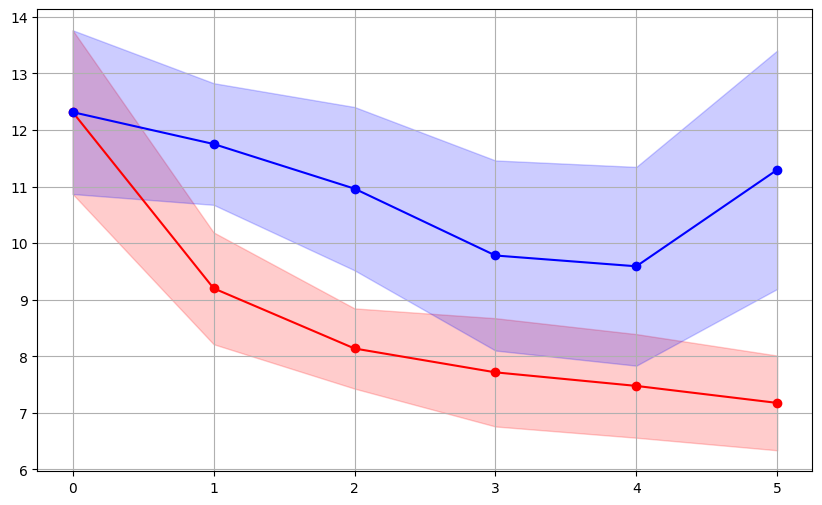

In [112]:
# result_set
# Lam1 데이터
x_lam = []
y_lam = []
yerr_lam = []
for i in range(6):
    key = f'Lam1_{i}'
    val = result_set[key]
    x_lam.append(i)
    y_lam.append(val[0])
    yerr_lam.append(val[1])

x_lam = np.array(x_lam)
y_lam = np.array(y_lam)
yerr_lam = np.array(yerr_lam)

# Sigma 데이터
x_sigma = []
y_sigma = []
yerr_sigma = []
for i in range(6):  # Sigma_0 ~ Sigma_5
    key = f'Sigma_{i}'
    val = result_set[key]
    x_sigma.append(i)
    y_sigma.append(val[0])
    yerr_sigma.append(val[1])

x_sigma = np.array(x_sigma)
y_sigma = np.array(y_sigma)
yerr_sigma = np.array(yerr_sigma)

# 그래프 그리기
plt.figure(figsize=(10,6))

# Lam1
plt.plot(x_lam, y_lam, marker='o', color='red', label='Ad-CBO ($\lambda_0$)')
plt.fill_between(x_lam, y_lam - yerr_lam, y_lam + yerr_lam, color='red', alpha=0.2)

# Sigma
plt.plot(x_sigma, y_sigma, marker='o', color='blue', label='CBO with noise ($\sigma$)')
plt.fill_between(x_sigma, y_sigma - yerr_sigma, y_sigma + yerr_sigma, color='blue', alpha=0.2)

# plt.xlabel('$\lambda_0$(red), $\sigma$(blue)')
# plt.ylabel('Value')
# plt.title('Confidence Intervals for $L(x_\infty)$')
# plt.legend()
plt.grid(True)
# plt.show()

plt.savefig("Confidence Intervals.pdf", format='pdf', bbox_inches='tight')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad

# 파라미터
h = 0.1
lambda0 = 1
mu = 1 - h*lambda0
a = np.sqrt(h)

# Lambda(sigma) 정의
def Lambda(sigma):
    integrand = lambda z: np.log(np.abs(mu - a*sigma*z)) * norm.pdf(z)
    val, _ = quad(integrand, -np.inf, np.inf, limit=200)
    return val

# sigma 범위
sigma_vals = np.linspace(0.01, 7, 200)  # 0 제외, 로그에서 0 방지
Lambda_vals = np.array([Lambda(s) for s in sigma_vals])

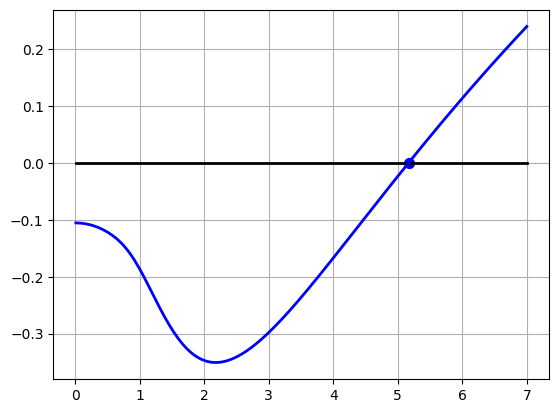

In [ ]:
# 그래프
plt.plot(sigma_vals,np.zeros(np.shape(sigma_vals)),color='black',linewidth=2)
plt.plot(sigma_vals, Lambda_vals, label=r'$\Lambda(\sigma)$',color='blue',linewidth=2)
plt.scatter(5.17, 0, color='blue', s=50)
plt.grid(True)
# plt.show()
plt.savefig("Lambda_vs_sigma.pdf", format='pdf', bbox_inches='tight')


In [ ]:
print(sigma_vals[146:148])
print(Lambda_vals[146:148])

[5.13834171 5.17346734]
[-0.00388192  0.00105335]
